In [2]:
import pandas as pd
import matplotlib.pyplot as plt
all_data = pd.read_csv('all_data.csv', index_col=0)
PM25 = pd.read_csv('PM25.csv', index_col=0)
model_data = all_data = pd.concat([all_data, PM25], axis=1)
model_data = model_data.rename(columns={model_data.columns[-1]: "PM2.5"})
model_data

,stacja,rok,miesiąc,dzień,temperatura,suma opadów,wilgotność,prędkość wiatru,zachmurzenine,day_number_in_year,PM2.5
0,KRAKÓW-OBSERWATORIUM,2014,1,1,0.3,0.0,94.5,0.7,7.3,1,94.0
1,KRAKÓW-OBSERWATORIUM,2014,1,2,-1.5,0.0,89.5,1.0,4.3,2,135.0
2,KRAKÓW-OBSERWATORIUM,2014,1,3,2.0,0.0,88.5,0.3,1.7,3,172.0
3,KRAKÓW-OBSERWATORIUM,2014,1,4,2.7,1.7,88.5,0.3,6.0,4,135.0
4,KRAKÓW-OBSERWATORIUM,2014,1,5,7.0,0.9,87.8,0.7,7.0,5,68.0
...,...,...,...,...,...,...,...,...,...,...,...
3525,KRAKÓW-OBSERWATORIUM,2023,8,27,22.2,0.5,85.3,0.7,3.7,239,9.9
3526,KRAKÓW-OBSERWATORIUM,2023,8,28,19.7,0.1,89.5,1.7,8.0,240,8.4
3527,KRAKÓW-OBSERWATORIUM,2023,8,29,21.0,0.9,89.0,1.0,7.7,241,10.2
3528,KRAKÓW-OBSERWATORIUM,2023,8,30,18.5,0.3,89.5,1.3,7.7,242,8.4


In [3]:
print(model_data["PM2.5"].isna().sum())
model_data = model_data.dropna(subset=["PM2.5"])
print(model_data["PM2.5"].isna().sum())

43
0


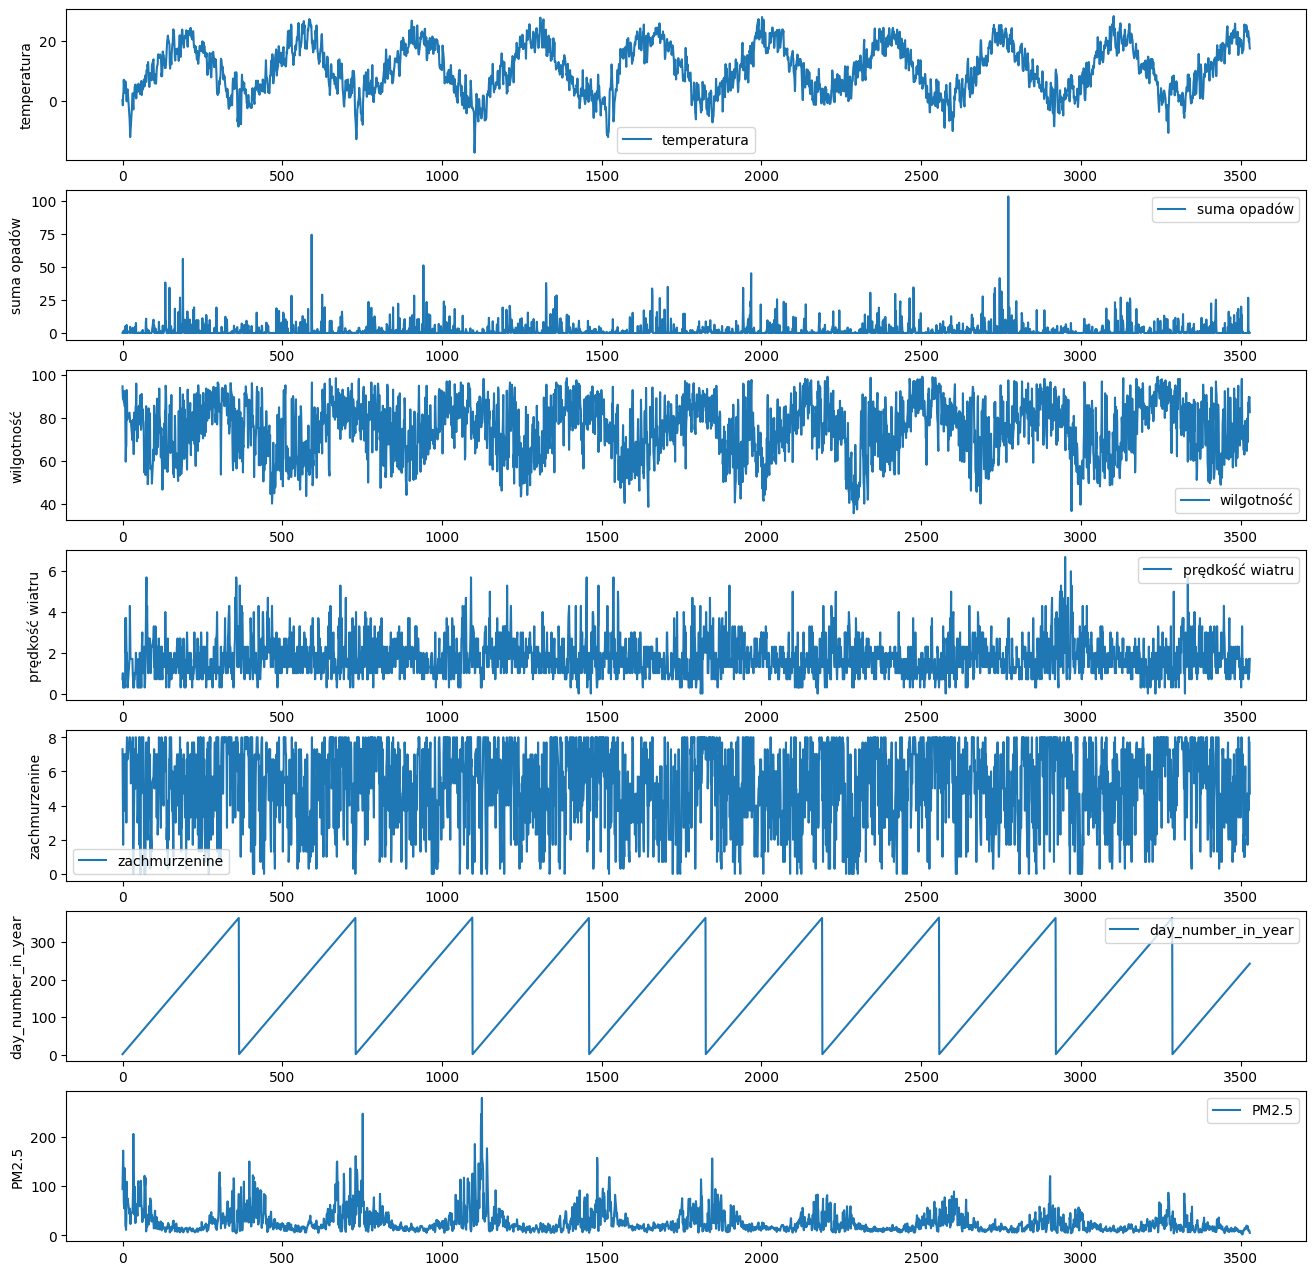

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(7, 1, figsize=(16, 16))

columns = ["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine","day_number_in_year", "PM2.5"]

for i, column in enumerate(columns):
    axs[i].plot(model_data.index, model_data[column], label=column)
    axs[i].set_ylabel(column)


for ax in axs:
    ax.legend()

plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame()
columns_to_standardize =  ["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine","day_number_in_year", "PM2.5"]
scaled_data[columns_to_standardize] = scaler.fit_transform(model_data[columns_to_standardize])
scaled_data

,temperatura,suma opadów,wilgotność,prędkość wiatru,zachmurzenine,day_number_in_year,PM2.5
0,-1.263997,-0.385199,1.526081,-1.213571,0.913062,-1.713235,2.768810
1,-1.486734,-0.385199,1.139045,-0.875087,-0.379434,-1.703651,4.456699
2,-1.053635,-0.385199,1.061638,-1.664882,-1.499597,-1.694068,5.979916
3,-0.967015,-0.057996,1.061638,-1.664882,0.352981,-1.684484,4.456699
4,-0.434923,-0.211974,1.007453,-1.213571,0.783813,-1.674900,1.698441
...,...,...,...,...,...,...,...
3482,1.445963,-0.288963,0.813935,-1.213571,-0.637933,0.567698,-0.693421
3483,1.136607,-0.365952,1.139045,-0.085292,1.214645,0.577282,-0.755173
3484,1.297472,-0.211974,1.100342,-0.875087,1.085395,0.586865,-0.681070
3485,0.988116,-0.327457,1.139045,-0.536604,1.085395,0.596449,-0.755173


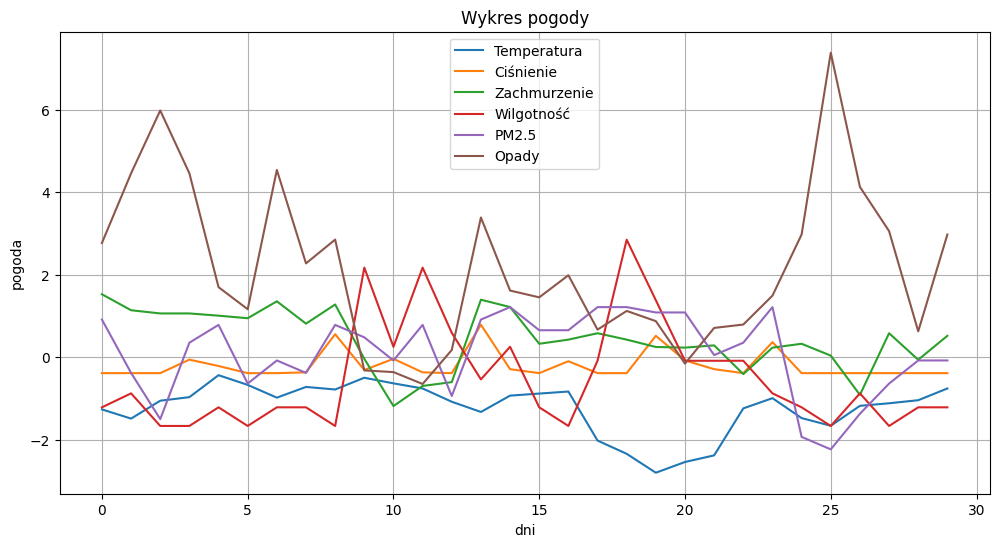

In [6]:
plt.figure(figsize=(12, 6)) 



x = range(len(scaled_data))
y1 = scaled_data['temperatura'][:30]
y2 = scaled_data['suma opadów'][:30]
y3 = scaled_data['wilgotność'][:30]
y4 = scaled_data['prędkość wiatru'][:30]
y5 = scaled_data['zachmurzenine'][:30]
y6 = scaled_data['PM2.5'][:30]


plt.plot(x[:30], y1, label='Temperatura')
plt.plot(x[:30], y2, label='Ciśnienie')
plt.plot(x[:30], y3, label='Zachmurzenie')
plt.plot(x[:30], y4, label='Wilgotność')
plt.plot(x[:30], y5, label='PM2.5')
plt.plot(x[:30], y6, label='Opady')


plt.xlabel('dni')
plt.ylabel('pogoda')
plt.title('Wykres pogody')
plt.legend()
plt.grid()
plt.show()

In [7]:
columns = ["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]
korelacja = model_data[columns + ["PM2.5"]].corr()
wynik = korelacja["PM2.5"].sort_values(ascending=False)
print(wynik)

PM2.5                 1.000000
wilgotność            0.188970
zachmurzenine        -0.096341
suma opadów          -0.146767
day_number_in_year   -0.146867
prędkość wiatru      -0.287146
temperatura          -0.506292
Name: PM2.5, dtype: float64


In [8]:
model_data.to_csv("model_data.csv")